# paste block taste
# add new line to every fullstop
# print line by line

In [9]:
import string
import re
import nltk
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw = input("Paste your text here:\n")

Paste your text here:
 傘心室：故事二 傘運參與者Cindy 敢言才可改變現况 2019/2/24 （潘曉彤攝） 1 photo 【明報專訊】這一次，心理學家請來Cindy對談。Cindy是居住大埔的退休人士，有許多嗜好，喜歡做麵包、種植、瑜伽，亦以交遊廣闊自豪。因為雨傘運動，她重新審視許多段一直珍視的友誼，赫然發現價值觀原來是人與人連結的關鍵。從整理自己在朋友群組裏的取態，回溯個人成長以及日常經歷，她認為敢言才可能改變現况，相信年輕人是未來的主人翁，支持他們爭取自己的未來，但最重要的，始終是審時度勢……面對記者鏡頭，她很忌諱。 ■答：Cindy ■問：盧楚穎、黃可為、葉劍青  無私與自私 問：當日你如何接觸雨傘運動？ 答：我本身住在大埔，大埔居民有個facebook群組。我覺得大埔居民很close，很踴躍參與社區事務，很熱情，很愛護自己的社群。我從那裏開始知道傘運。發射第一枚催淚彈，他們第一時間有人提出點樣參與、點樣支援。 問：感覺如何？ 答：我覺得很突然，有無搞錯啊，政府瘋了。我以中年人身分看，覺得不用這樣對細蚊仔。我有些朋友說梁振英政府內部下了命令，似乎想用比較粗暴的方式制止群眾繼續參與，很強硬阻止班細路再深化件事。我覺得他們理想很單純，使乜咁啊？居民群組裏的人很踴躍，有些的士司機想免費接載居民、運送物資，我本身不是很贊成，可能作為媽媽，其實感動，但覺得危險，有出聲問可不可以不要去。 問：你說的感動是怎麼一回事？ 答：開心是因為大埔這個社群很熱血，對社會還很有熱情，示威群眾遇到危險第一時間支援，覺得團結，很少見三唔識七會不顧危險地幫忙。以前我覺得後生仔好像對政治很冷感，但在那裏第一時間支援我就覺得……不只後生仔，還有些中年人，比如的士司機是中年人，不只的士司機，還有些大埔居民自己揸車運水出去。 問：是不是覺得那一刻社會不同了？ 答：對啊，突然好像不同了。黃之鋒很早期由反國教開始已經在大埔區擺過街站，都幾活躍。覺得後生仔開始關心社會，但就不太覺得中年人會。但由公民廣場發生事開始，覺得中年人和後生仔有了些互動，目標突然好像一致了。不單後生仔突然醒覺，某部分中年人都是。好像我們五十幾歲，成長於八十年代初，經濟起飛，我們是最受惠的，現在是收成期，只要我們唔出聲，扮懵，不怎麼爭取權利啦，其實對我們影響不太大。好話唔好聽，有屋有樓，有穩定工作，不會太

In [4]:
target = '我'
raw.count(target)

87

In [5]:
di = {}
for c in raw:
    if c in di:
        di[c]+=1
    else:
        di[c]=0

df = pd.DataFrame(data=[di.keys(),di.values()]).T
df.columns = ['word','count']
df.sort_values(by='count',ascending=False,inplace=True)
df.head(20)

,word,count
50,，,269
58,。,94
64,的,86
186,我,86
237,不,79
7,,71
59,是,67
69,有,60
67,人,55
3,：,49


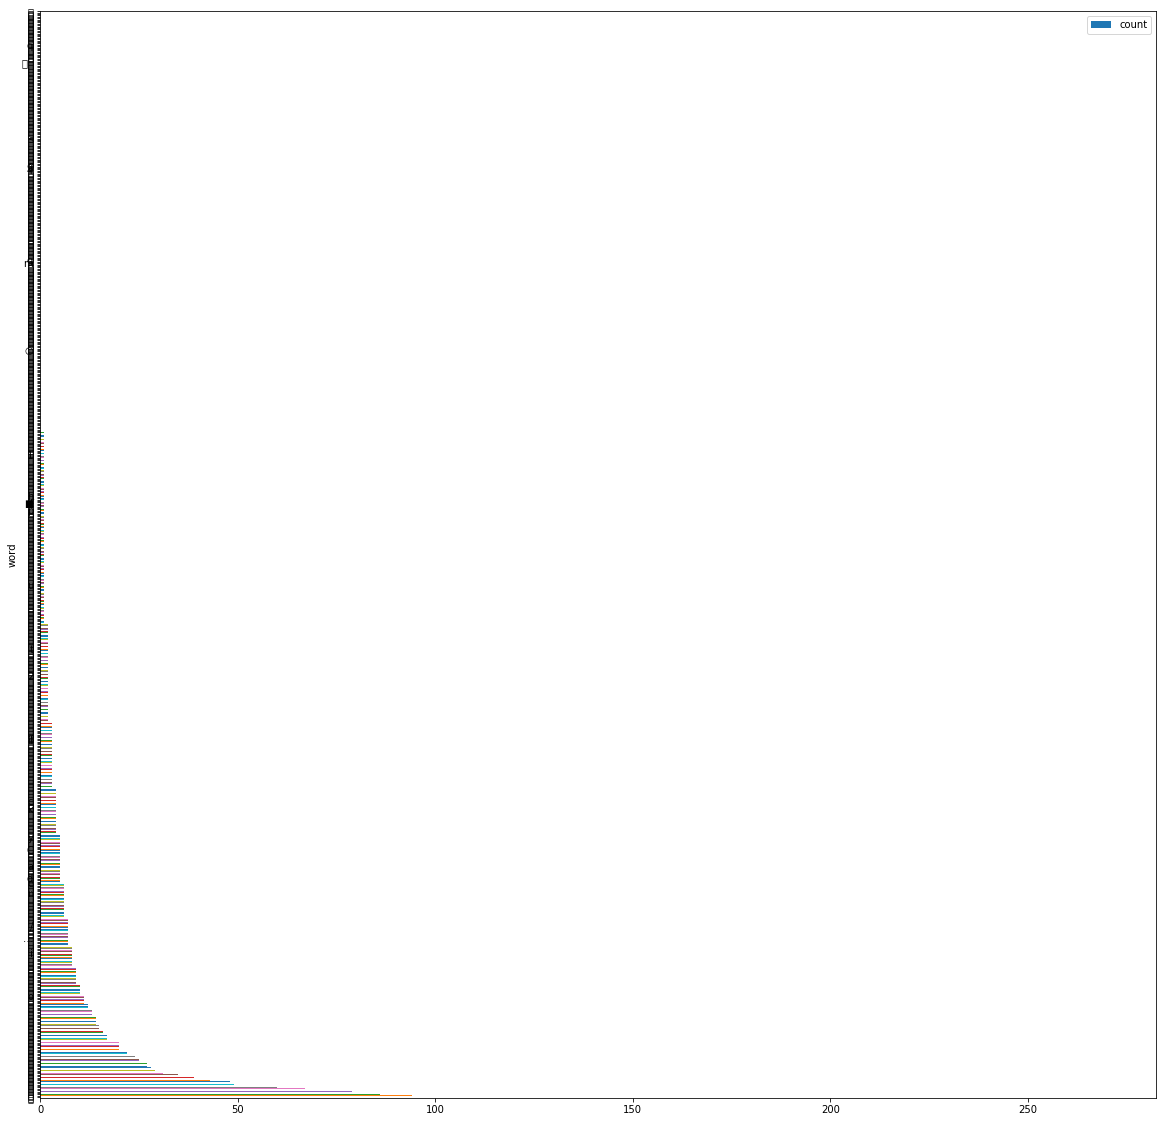

In [15]:
df.plot.barh(x="word",y='count',figsize=(20,20))

# sns.barplot(x=df.word,y=df.count)
# sns.barplot(data=df)

In [7]:
linebreakers = "!.?？。"
temp = raw
for mark in linebreakers:
    temp = temp.replace(mark,mark+"\n")
parsed = temp
# print(parsed)

mylist = [i.strip() for i in parsed.split("\n")]
for k,v in enumerate(mylist):
    print(k,v,sep="\n")

0
傘心室：故事二 傘運參與者Cindy 敢言才可改變現况 2019/2/24 （潘曉彤攝） 1 photo 【明報專訊】這一次，心理學家請來Cindy對談。
1
Cindy是居住大埔的退休人士，有許多嗜好，喜歡做麵包、種植、瑜伽，亦以交遊廣闊自豪。
2
因為雨傘運動，她重新審視許多段一直珍視的友誼，赫然發現價值觀原來是人與人連結的關鍵。
3
從整理自己在朋友群組裏的取態，回溯個人成長以及日常經歷，她認為敢言才可能改變現况，相信年輕人是未來的主人翁，支持他們爭取自己的未來，但最重要的，始終是審時度勢……面對記者鏡頭，她很忌諱。
4
■答：Cindy ■問：盧楚穎、黃可為、葉劍青  無私與自私 問：當日你如何接觸雨傘運動？
5
答：我本身住在大埔，大埔居民有個facebook群組。
6
我覺得大埔居民很close，很踴躍參與社區事務，很熱情，很愛護自己的社群。
7
我從那裏開始知道傘運。
8
發射第一枚催淚彈，他們第一時間有人提出點樣參與、點樣支援。
9
問：感覺如何？
10
答：我覺得很突然，有無搞錯啊，政府瘋了。
11
我以中年人身分看，覺得不用這樣對細蚊仔。
12
我有些朋友說梁振英政府內部下了命令，似乎想用比較粗暴的方式制止群眾繼續參與，很強硬阻止班細路再深化件事。
13
我覺得他們理想很單純，使乜咁啊？
14
居民群組裏的人很踴躍，有些的士司機想免費接載居民、運送物資，我本身不是很贊成，可能作為媽媽，其實感動，但覺得危險，有出聲問可不可以不要去。
15
問：你說的感動是怎麼一回事？
16
答：開心是因為大埔這個社群很熱血，對社會還很有熱情，示威群眾遇到危險第一時間支援，覺得團結，很少見三唔識七會不顧危險地幫忙。
17
以前我覺得後生仔好像對政治很冷感，但在那裏第一時間支援我就覺得……不只後生仔，還有些中年人，比如的士司機是中年人，不只的士司機，還有些大埔居民自己揸車運水出去。
18
問：是不是覺得那一刻社會不同了？
19
答：對啊，突然好像不同了。
20
黃之鋒很早期由反國教開始已經在大埔區擺過街站，都幾活躍。
21
覺得後生仔開始關心社會，但就不太覺得中年人會。
22
但由公民廣場發生事開始，覺得中年人和後生仔有了些互動，目標突然好像一致了。
23
不單後生仔突然醒覺，某部分中年人都是。
24
好像我們五十幾歲，成長於八十年代初，經濟起飛，我們是最受惠的，